<a href="https://colab.research.google.com/github/ZoubirCHATTI/06_Collinearity_problem_resolution/blob/main/notebook/01_Multicollinearity_problem_solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principle component analysis for solving collinearity problem**

In this notebook, we analyze power consumption in Île-de-France using several variables that may influence it. After examining the data, we found that many of these variables are highly correlated and provide little additional information about power consumption. To address this issue, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the problem, retaining only the components that explain most of the variability in the data

**01_Libraries importation and data uploading**

In [2]:
#Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
#Path to data file
path='https://raw.githubusercontent.com/ZoubirCHATTI/06_Collinearity_problem_resolution/main/data/Ile_de_france.xlsx'

In [4]:
#Uploading data file
df=pd.read_excel(path)

**02_Visual inspection of the data**

In [5]:
#Visual inspection of the data
df.head()

,Conso totale (MWh),Nb sites,Nombre d'habitants,Taux de chauffage électrique,Taux de logements collectifs,Taux de résidences principales,Superficie des logements <30 m2,Superficie des logements 30 à 40 m2,Superficie des logements 40 à 60 m2,Superficie des logements 60 à 80 m2,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2
0,685.798,141,263.0,0.146552,0.006803,0.899225,0.000000,0.000000,1.000000,18.000000,42.000000,55.000000
1,1381.207,233,523.0,0.154229,0.109766,0.963896,3.080306,0.000000,8.214149,22.588910,37.990440,134.506692
2,886.114,158,373.0,0.175182,0.033481,0.978390,0.000000,4.043011,2.021505,11.118280,18.193548,103.096774
3,151.761,36,74.0,0.055556,0.074906,0.946746,0.000000,0.000000,1.975309,0.987654,6.913580,25.679012
4,4423.200,781,1413.0,0.228472,0.006264,0.853058,3.014828,19.087325,37.167313,103.400111,208.761015,234.569408


The data represents power consumption in the Île-de-France region, specifically in the residential sector. The variables are expressed per site. For example, if the number of inhabitants is given as 263 and the number of sites is 141, this means that each site has on average 263 inhabitants, leading to a total of
141×263 inhabitants across all sites. The same interpretation applies to other variables such as accommodation surfaces, principal residences, and so on.

In [6]:
df.describe()

,Conso totale (MWh),Nb sites,Nombre d'habitants,Taux de chauffage électrique,Taux de logements collectifs,Taux de résidences principales,Superficie des logements <30 m2,Superficie des logements 30 à 40 m2,Superficie des logements 40 à 60 m2,Superficie des logements 60 à 80 m2,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2
count,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000
mean,4287.881252,1029.268760,1891.633246,0.348002,0.326573,1.220898,35.929948,45.686060,122.912042,183.054037,191.704759,256.913207
std,17470.491155,6136.527383,10263.907223,1.086203,3.051748,3.466605,611.092722,533.972707,1214.837143,1326.373816,795.852038,750.929239
min,30.628000,10.000000,4.000000,0.000000,0.000000,0.066734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,589.413000,112.000000,197.000000,0.162791,0.012806,0.800973,0.000000,0.979381,3.480000,10.000000,21.130435,45.362903
50%,1355.203000,243.000000,463.000000,0.250759,0.038630,0.918975,1.000000,2.090002,9.880342,25.000000,50.783093,100.406891
75%,3352.066000,608.000000,1183.000000,0.346875,0.107519,0.972649,3.126976,8.587643,30.253883,72.232477,134.667563,235.048622
max,839564.385000,309367.000000,522228.000000,56.680623,174.552288,170.935354,39649.941027,29903.846952,67093.338666,67481.683267,38465.364694,32974.896284


In [7]:
#Checking the presence of null values in the data
df.isnull().sum()

,0
Conso totale (MWh),0
Nb sites,0
Nombre d'habitants,0
Taux de chauffage électrique,0
Taux de logements collectifs,0
Taux de résidences principales,0
Superficie des logements <30 m2,0
Superficie des logements 30 à 40 m2,0
Superficie des logements 40 à 60 m2,0
Superficie des logements 60 à 80 m2,0


Data is clean overall and there is no NAN values present

**03_Checking the correlation between variables**

<Axes: >

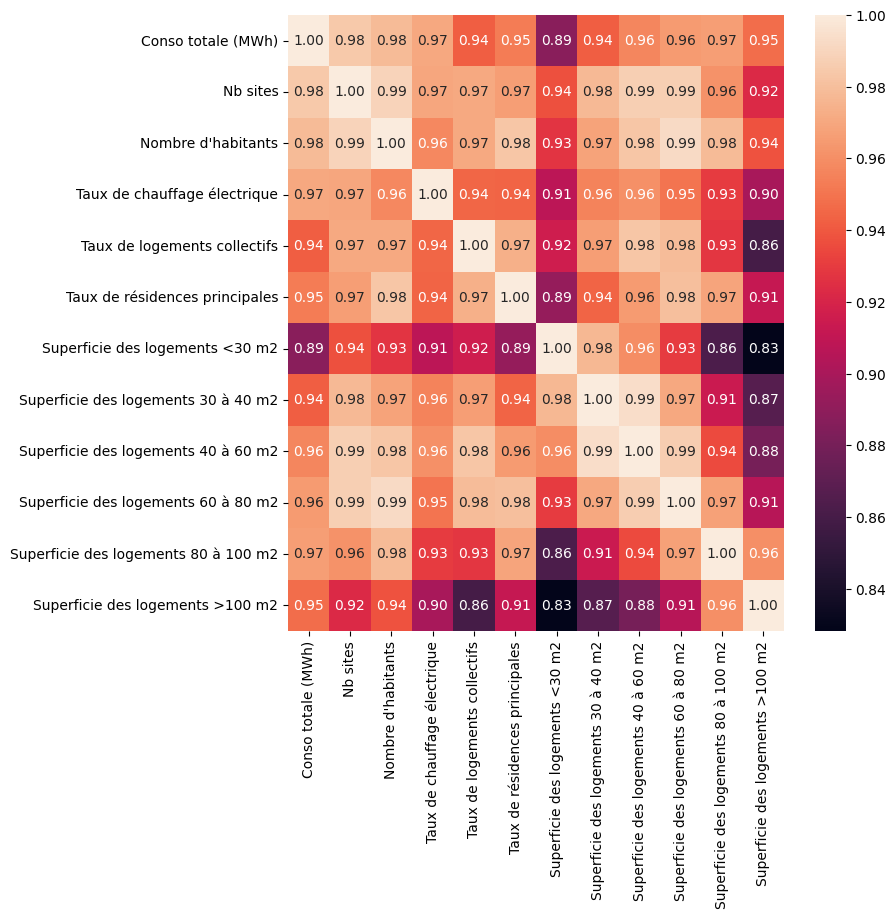

In [8]:
#Creation of correlation map
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), fmt=".2f", annot=True)

The correlation map suggests that most of the variables are highly correlated, indicating a multicollinearity problem. Therefore, simply combining these variables—whether in a linear or nonlinear model—would not add much new information. For this reason, I chose to switch to PCA analysis, keeping only the components that explain most of the variance.

**04_Dimensionality Reduction of the Problem**

In [9]:
#Applying PCA decomposition
from sklearn.decomposition import PCA
pca=PCA()
variables=df.drop('Conso totale (MWh)', axis=1)            #We drop the target we keep only the variables
target=df['Conso totale (MWh)']

In [10]:
# Apply PCA to reduce dimensionality of the dataset
# 'variables' contains the original features influencing power consumption
x_pca=pca.fit_transform(variables)

# Get the proportion of variance explained by each principal component
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[9.94197293e-01 4.41251758e-03 8.69084209e-04 2.99409635e-04
 1.16881793e-04 5.33234006e-05 4.46916216e-05 6.79512600e-06
 2.77793218e-09 7.30998063e-10 3.63523532e-10]


It is clear that the first principal component explains almost all the variance (99.42%), which justifies keeping only this component for further analysis.

In [11]:
#Keeping only the first component
principal_component=x_pca[: , 0].reshape(-1 , 1)

**05_Linear Model Generation to Predict Power Consumption After Dimensionality Reduction**

In [12]:
#Splitting the data to train and test subdatasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(principal_component, target, train_size=0.7, random_state=42)

In [13]:
#Generate a linear model to predict power consumption from the first component:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
#The coeffficient and inercept of the trained linear regression model
a=model.coef_                   #Extraction of the coefficient
b=model.intercept_              #Extraction of the inttercept
print(f"The model coefficient and intercept are {a[0]:.2f} and {b:.2f}, respectively")

The model coefficient and intercept are 1.40 and 4268.50, respectively


In [16]:
#Power consumption predicted from the generated linear model
Y_predict=model.predict(X_test)

In [17]:
#Evaluation of the effectiveness of the model
from sklearn.metrics import  r2_score, mean_squared_error                       #Importing evaluation metrics (r2 score and MSE)
mse=mean_squared_error(Y_test, Y_predict)                                       #Calculation of mea squared error beteen rel and predicted values
R_2=r2_score(Y_test, Y_predict)                                                 #Calculation of determination coefficient
print(f"the mean squared error is {mse}\nDetemination coefficient={R_2:.2f} ")

the mean squared error is 7762355.25025076
Detemination coefficient=0.93 


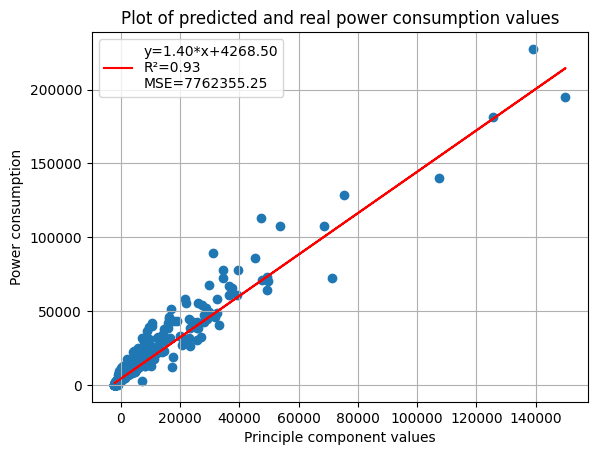

In [20]:
#Plotting of the results
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_predict, color='r', label=f"y={a[0]:.2f}*x+{b:.2f}\nR²={R_2:.2f}\nMSE={mse:.2f}")
plt.xlabel('Principle component values')
plt.ylabel('Power consumption')
plt.title("Plot of predicted and real power consumption values")
plt.grid(True)
plt.legend()

The R² score measures the proportion of variance in the target variable that is explained by the model. In our case, R² = 0.93, which means that 93% of the variability in power consumption is captured by the model using the principal component(s). This indicates that the model fits the data very well and is able to explain most of the fluctuations in power consumption in Île-de-France. A high R² like this suggests that the dimensionality reduction via PCA has retained the essential information needed for accurate predictions